Current directory '/home/psimmerl/Documents/CMS/LLP/notebooks'
Using output directory '/home/psimmerl/Documents/CMS/LLP/notebooks/reports/weekly/may15/'
Processing dt_mb1_jet_muon_mc_ca_0p6.root
Processing dt_mb1_jet_muon_r3_ca_0p6.root
(1576334, 6) 1156713 419621


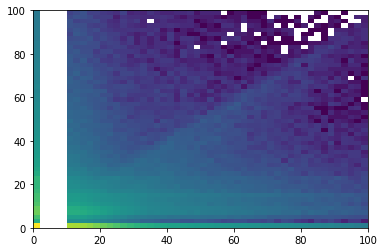

In [25]:
from os import getcwd
from ROOT import RDataFrame
import ROOT as rt
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

# Parameters
save_date = 'may15'
############

rt.gROOT.SetBatch()
cur_dir = getcwd()

data_in_dir = cur_dir + '/../data/processed/'
data_out_dir = cur_dir + '/../data/processed/'
out_dir = cur_dir + f"/reports/weekly/{save_date}/"
ending = ".png"

print(f"Current directory '{cur_dir}'")
print(f"Using output directory '{out_dir}'")

fname_sig = "dt_mb1_jet_muon_mc_ca_0p6.root"
fname_bkg = "dt_mb1_jet_muon_r3_ca_0p6.root"

col_names = [
    "nDtRechitClusters", "dtRechitClusterSize", "dtRechitClusterNSegStation1", "dtRechitClusterJetVetoLooseId", "dtRechitClusterJetVetoPt",
    "dtRechitClusterMuonVetoLooseId", "dtRechitClusterMuonVetoPt"
]
data = []

for fname in [fname_sig, fname_bkg]:
    print(f"Processing {fname}")
    yy = 1 if '_mc_' in fname else 0
    data_rt_fmt = RDataFrame('ReducedMuonSystem', data_in_dir + fname).AsNumpy(col_names)
    for i, ndt in enumerate(data_rt_fmt['nDtRechitClusters']):
        for j in range(ndt):
            data.append([
                float(data_rt_fmt["dtRechitClusterNSegStation1"][i][j])/float(data_rt_fmt["dtRechitClusterSize"][i][j]),
                float(data_rt_fmt["dtRechitClusterJetVetoLooseId"][i][j]),
                float(data_rt_fmt["dtRechitClusterJetVetoPt"][i][j]),
                float(data_rt_fmt["dtRechitClusterMuonVetoLooseId"][i][j]),
                float(data_rt_fmt["dtRechitClusterMuonVetoPt"][i][j]),
                yy,
            ])

data = np.array(data)  # everything
print(data.shape, np.sum(data[:, -1] == 0), np.sum(data[:, -1] == 1))
plt.hist2d(data[:, 2], data[:, 4], 50, [[0, 100], [0, 100]], norm=mpl.colors.LogNorm());


In [26]:

hasJet  = (data[:,2]>0).reshape(-1)
hasMuon = (data[:,4]>0).reshape(-1)
hasJetMuon = (hasJet & hasMuon)
hasNothing = (hasJet | hasMuon) == 0
hasOnlyJet, hasOnlyMuon = hasJet & (hasMuon==0), (hasJet==0) & hasMuon
data_j = data[hasJet][:,[0,2,5]] # has jet
data_m = data[hasMuon][:,[0,4,5]] # has muon
data_oj = data[hasOnlyJet][:,[0,2,5]] # has only jet
data_om = data[hasOnlyMuon][:,[0,4,5]] # has only muon
data_jm = data[hasJetMuon][:,[0,2,4,5]] # has jet AND muon
data_no = data[hasNothing][:,[0,5]] # has nothing

print(f"name    |  total  |  bkg   |  gLLP  ")
print(f"--------+---------+--------+---------")
print(f"data_j  | {len(data_j):>7,} | {np.sum(data_j[:,-1]==0):>7,} | {np.sum(data_j[:,-1]==1):>7,}")
print(f"data_m  | {len(data_m):>7,} | {np.sum(data_m[:,-1]==0):>7,} | {np.sum(data_m[:,-1]==1):>7,}")
print(f"data_oj | {len(data_oj):>7,} | {np.sum(data_oj[:,-1]==0):>7,} | {np.sum(data_oj[:,-1]==1):>7,}")
print(f"data_om | {len(data_om):>7,} | {np.sum(data_om[:,-1]==0):>7,} | {np.sum(data_om[:,-1]==1):>7,}")
print(f"data_jm | {len(data_jm):>7,} | {np.sum(data_jm[:,-1]==0):>7,} | {np.sum(data_jm[:,-1]==1):>7,}")
print(f"data_no | {len(data_no):>7,} | {np.sum(data_no[:,-1]==0):>7,} | {np.sum(data_no[:,-1]==1):>7,}")


name    |  total  |  bkg   |  gLLP  
--------+---------+--------+---------
data_j  | 758,737 | 596,685 | 162,052
data_m  | 391,413 | 179,745 | 211,668
data_oj | 549,977 | 489,315 |  60,662
data_om | 182,653 |  72,375 | 110,278
data_jm | 208,760 | 107,370 | 101,390
data_no | 634,944 | 487,653 | 147,291


In [27]:

hasJet  = ((data[:,1]==1) & (data[:,2]>0)).reshape(-1)
hasMuon = ((data[:,3]==1) & (data[:,4]>0)).reshape(-1)
hasJetMuon = (hasJet & hasMuon)
hasNothing = (hasJet | hasMuon) == 0
hasOnlyJet, hasOnlyMuon = hasJet & (hasMuon==0), (hasJet==0) & hasMuon
data_j = data[hasJet][:,[0,2,5]] # has jet
data_m = data[hasMuon][:,[0,4,5]] # has muon
data_oj = data[hasOnlyJet][:,[0,2,5]] # has only jet
data_om = data[hasOnlyMuon][:,[0,4,5]] # has only muon
data_jm = data[hasJetMuon][:,:] # has jet AND muon
data_no = data[hasNothing][:,[0,5]] # has nothing

print(f"name    |  total  |   bkg  |  gLLP  ")
print(f"--------+---------+--------+--------")
print(f"data_j  | {len(data_j):>7,} | {np.sum(data_j[:,-1]==0):>7,} | {np.sum(data_j[:,-1]==1):>7,}")
print(f"data_m  | {len(data_m):>7,} | {np.sum(data_m[:,-1]==0):>7,} | {np.sum(data_m[:,-1]==1):>7,}")
print(f"data_oj | {len(data_oj):>7,} | {np.sum(data_oj[:,-1]==0):>7,} | {np.sum(data_oj[:,-1]==1):>7,}")
print(f"data_om | {len(data_om):>7,} | {np.sum(data_om[:,-1]==0):>7,} | {np.sum(data_om[:,-1]==1):>7,}")
print(f"data_jm | {len(data_jm):>7,} | {np.sum(data_jm[:,-1]==0):>7,} | {np.sum(data_jm[:,-1]==1):>7,}")
print(f"data_no | {len(data_no):>7,} | {np.sum(data_no[:,-1]==0):>7,} | {np.sum(data_no[:,-1]==1):>7,}")


name    |  total  |   bkg  |  gLLP  
--------+---------+--------+--------
data_j  | 247,411 | 130,634 | 116,777
data_m  |  22,026 |  14,033 |   7,993
data_oj | 230,944 | 119,940 | 111,004
data_om |   5,559 |   3,339 |   2,220
data_jm |  16,467 |  10,694 |   5,773
data_no | 1,323,364 | 1,022,740 | 300,624


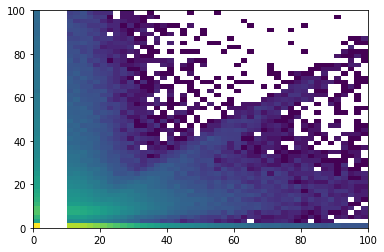

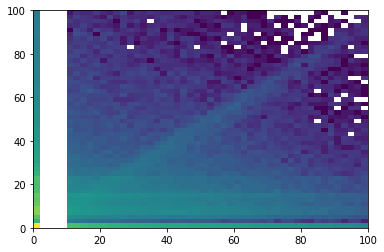

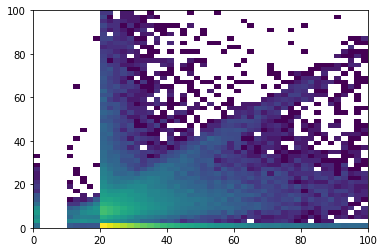

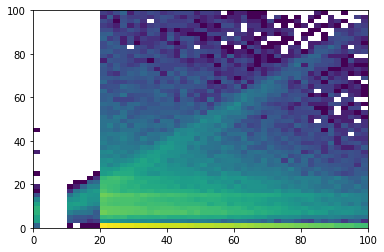

In [28]:
bkg = data[data[:,-1] == 0]
gllP = data[data[:,-1] == 1]
plt.hist2d(bkg[:,2], bkg[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(gllP[:,2], gllP[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()

data2 = data[(data[:,1]==1) | (data[:,3]==1)]
bkg = data2[data2[:,-1] == 0]
gllP = data2[data2[:,-1] == 1]
plt.hist2d(bkg[:,2], bkg[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()
plt.hist2d(gllP[:,2], gllP[:,4], 50, [[0,100],[0,100]], norm=mpl.colors.LogNorm())
plt.show()



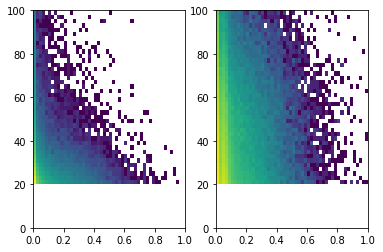

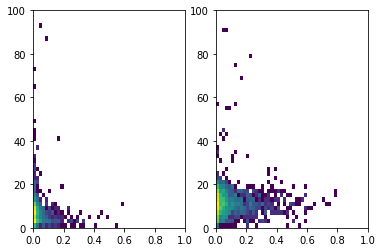

In [31]:
fig1, axs1 = plt.subplots(1,2)#,fig_size=(10,5))

ibkg, isig = data_oj[:,-1]==0, data_oj[:,-1]==1
axs1[0].hist2d(data_oj[ibkg,0], data_oj[ibkg,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())
axs1[1].hist2d(data_oj[isig,0], data_oj[isig,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())

fig2, axs2 = plt.subplots(1,2)#,fig_size=(10,5))

ibkg, isig = data_om[:,-1]==0, data_om[:,-1]==1
axs2[0].hist2d(data_om[ibkg,0], data_om[ibkg,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())
axs2[1].hist2d(data_om[isig,0], data_om[isig,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())

print('')

0.4810343633088541
0.7476877511431342 0.7489434668144659
-0.378784560328989


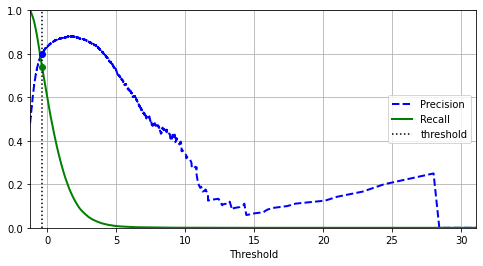

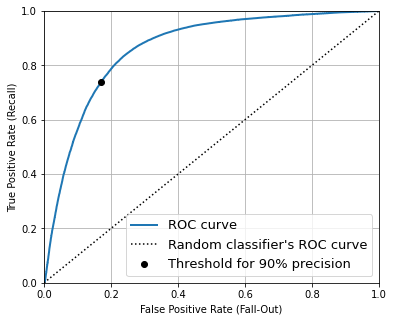

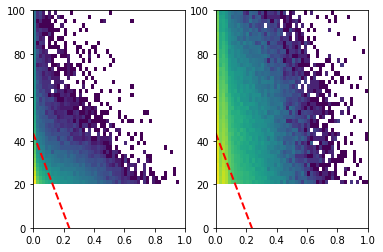

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
data_oj, data_om, data_no
X, y = data_oj[:,[0,1]],data_oj[:,-1]

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.5)
print(np.sum(y_trn)/y_trn.shape[0])

sclr = StandardScaler()
X_trn = sclr.fit_transform(X_trn)
X_tst = sclr.transform(X_tst)
clf = LinearDiscriminantAnalysis()


clf.fit(X_trn, y_trn)
print(clf.score(X_trn,y_trn), clf.score(X_tst,y_tst))

y_tst_scores = clf.decision_function(X_tst)


from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_tst, y_tst_scores)
threshold_prec90 = thresholds[(precisions>=0.8).argmax()]
print(threshold_prec90)
plt.figure(figsize=(8, 4))  # extra code – it's not needed, just formatting
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
plt.vlines(threshold_prec90, 0, 1.0, "k", "dotted", label="threshold")

# extra code – this section just beautifies and saves Figure 3–5
idx = (thresholds >= threshold_prec90).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([min(thresholds), max(thresholds), 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_tst, y_tst_scores)
idx_for_threshold_at_90 = (thresholds <= threshold_prec90).argmax()
tpr_90, fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")

# extra code – just beautifies and saves Figure 3–7
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.grid()
plt.axis([0, 1, 0, 1])
plt.legend(loc="lower right", fontsize=13)

plt.show()

fig1, axs1 = plt.subplots(1,2)#,fig_size=(10,5))

ibkg, isig = data_oj[:,-1]==0, data_oj[:,-1]==1
axs1[0].hist2d(data_oj[ibkg,0], data_oj[ibkg,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())
axs1[1].hist2d(data_oj[isig,0], data_oj[isig,1], 50, [[0,1],[0,100]], norm=mpl.colors.LogNorm())


x1 = np.array([np.linspace(0,100,100),np.linspace(0,100,100)]).T
x1=sclr.transform(x1)[:,0]
b, w1, w2 = clf.intercept_, clf.coef_[0][0], clf.coef_[0][1]
y1 = -(b+x1*w1 - threshold_prec90)/w2 

x1, y1 = sclr.inverse_transform(np.c_[x1,y1]).T
axs1[0].plot(x1,y1,'--r',lw=2)
axs1[1].plot(x1,y1,'--r',lw=2)

In [ ]:
y1

array([  0.1115264 ,  -0.85659194,  -1.82471027,  -2.79282861,
        -3.76094695,  -4.72906528,  -5.69718362,  -6.66530196,
        -7.63342029,  -8.60153863,  -9.56965696, -10.5377753 ,
       -11.50589364, -12.47401197, -13.44213031, -14.41024864,
       -15.37836698, -16.34648532, -17.31460365, -18.28272199,
       -19.25084033, -20.21895866, -21.187077  , -22.15519533,
       -23.12331367, -24.09143201, -25.05955034, -26.02766868,
       -26.99578702, -27.96390535, -28.93202369, -29.90014202,
       -30.86826036, -31.8363787 , -32.80449703, -33.77261537,
       -34.74073371, -35.70885204, -36.67697038, -37.64508871,
       -38.61320705, -39.58132539, -40.54944372, -41.51756206,
       -42.48568039, -43.45379873, -44.42191707, -45.3900354 ,
       -46.35815374, -47.32627208, -48.29439041, -49.26250875,
       -50.23062708, -51.19874542, -52.16686376, -53.13498209,
       -54.10310043, -55.07121877, -56.0393371 , -57.00745544,
       -57.97557377, -58.94369211, -59.91181045, -60.87